In [ ]:
#@title 


%%HTML
<div style="text-align:center; display:flex; justify-content:space-between;">
<div style="width:25%; height:150px; display: flex;">

<img src="https://giecaruff.github.io/sites/gss_semana_2020/logos/GSS_semana_geofisica.png" height="40%">

</div>
<div style="width:50%; height:150px; text-align:center;">

<br><br>

<span style="color:purple; font-size: 16pt;">Minicurso Python para Geofísicos <br></span>
<span style="color:purple; font-size: 25pt;font-weight: bold;">Atributos Sísmicos Básicos</span>

</div>

<div style="width:25%; height:150px; text-align:right">
<img src="https://giecaruff.github.io/sites/gss_semana_2020/logos/logo_colorida_icone.png" height="60%">
</div>
</div>

<div>
<center> <span style="color:purple; font-size: 25pt;font-weight: bold;center">Equipe:</span>
<br><br>

<div style="width:172px;text-align:center;display:inline-block;"> <span style="color:#92d14f; font-size: 14pt;font-weight: bold;">Fernando Vizeu</span> <div><img src="https://giecaruff.github.io/sites/gss_semana_2020/integrantes/vizeu.jfif" width="150px" style="border-radius:50%;border-style: solid;"></div> <span style="color:#3991c9; font-size: 10pt">fernandovizeu@id.uff.br</span> </div>
<div style="width:172px;text-align:center;display:inline-block;"> <span style="color:#92d14f; font-size: 14pt;font-weight: bold;">Mário Martins</span> <div><img src="https://giecaruff.github.io/sites/gss_semana_2020/integrantes/mario_machine.png" width="150px" style="border-radius:50%;border-style: solid;"></div> <span style="color:#3991c9; font-size: 10pt">mario_martins@id.uff.br</span> </div>
<div style="width:172px;text-align:center;display:inline-block;"> <span style="color:#92d14f; font-size: 14pt;font-weight: bold;">Rodrigo Mota</span> <div><img src="https://giecaruff.github.io/sites/gss_semana_2020/integrantes/rodrigo_dutra.jfif" width="150px" style="border-radius:50%;border-style: solid;"></div> <span style="color:#3991c9; font-size: 10pt">dutrarodrigo@id.uff.br</span> </div>
<div style="white;width:172px;text-align:center;display:inline-block;"> <span style="color:#92d14f; font-size: 14pt;font-weight: bold;">Rodrigo Bijani</span> <div><img src="https://giecaruff.github.io/sites/gss_semana_2020/integrantes/rodrigo_bijani.jfif" width="150px" style="border-radius:50%;border-style: solid;"></div> <span style="color:#3991c9; font-size: 10pt">rodrigobijani@id.uff.br</span> </div>

</div>

# Atributos sísmicos básicos

Nessa atividade iremos abrir um dado sísmico real e calcular e visualizar alguns atributos sísmicos.

## Dado utilizado

Nós utilizaremos o conjunto de dados Stratton 3D, disponibilizado no formato SEG-Y pela SEG em [wiki.seg.org/wiki/Open_data](https://wiki.seg.org/wiki/Open_data). Trata-se de um dado terrestre 3D já processado adquirido no sul do Texas. Esse conjunto de dados foi cedido para estudos pelo Departamento de Geologia Econômica da Universidade de Texas em Austin (Bureau of Economic Geology at the University of Texas at Austin).

In [1]:
# Criando a pasta de dados
!mkdir -p dados
# Fazendo download do dado
!wget http://s3.amazonaws.com/open.source.geoscience/open_data/stratton/segy/processed/Stratton3D_32bit.sgy -O dados/stratton.sgy

--2020-09-15 13:15:20--  http://s3.amazonaws.com/open.source.geoscience/open_data/stratton/segy/processed/Stratton3D_32bit.sgy
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.85.222
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.85.222|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 443764680 (423M) [application/octet-stream]
Saving to: ‘dados/stratton.sgy’

dados/stratton.sgy  100%[===================>] 423.21M  46.2MB/s    in 8.1s    

2020-09-15 13:15:28 (52.5 MB/s) - ‘dados/stratton.sgy’ saved [443764680/443764680]



## Formato SEG-Y

O formato SEG-Y foi inicialmente desenvolvido pela SEG no início da década de 70 com o objetivo de armazenar dados sísmicos demultiplexados para processamento. O formato passou por duas revisões em 2002 (rev1) e 2017 (rev2) para se adequar às novas necessidades da indústria. Uma lista com todos os formatos desenvolvidos pela SEG e suas especificações podem ser encontradas em: [seg.org/Publications/SEG-Technical-Standards](https://seg.org/Publications/SEG-Technical-Standards).

O formato SEG-Y armazena dados de forma sequêncial como mostrado abaixo:

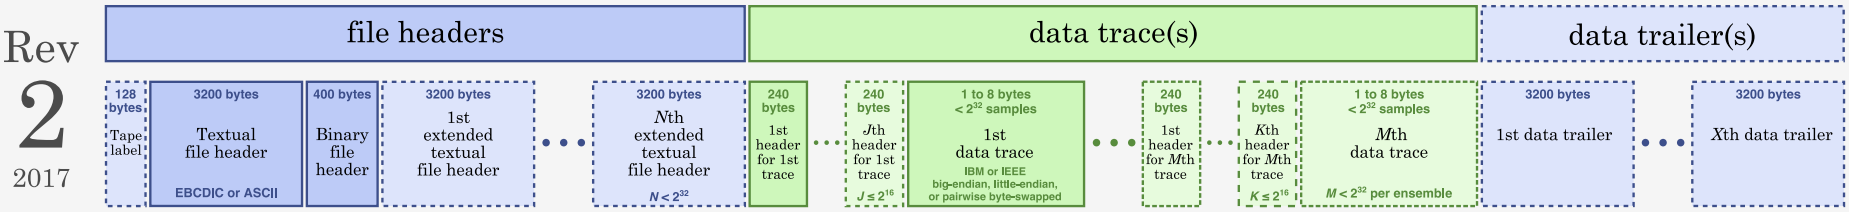

Os componentes principais de um dado SEG-Y são:
- Cabeçalho Textual
- Cabeçalho binário do arquivo
- Traços sísmicos, subdivididos por sua vez em:
  - Cabeçalho binário do traço
  - Dados do traço

O cabeçalho textual contém informações que podem ser lidas pelo usuário sem necessidade de qualquer software especializado.

No cabeçalho binário do arquivo estão informações relevantes para o arquivo como um todo, como o número de traços, intervalo de amostragem, codificação do dado, etc.

Já no cabeçalho binário do traço estão as informações relativas a cada traço, como por exemplo os números da inline e crossline, posição e etc.

### Lendo arquivos SEG-Y no Python com a biblioteca segyio

A biblioteca segyio é uma biblioteca de código aberto desenvolvida pela Equinor para leitura e escrita de arquivos no formato SEG-Y. Seu código fonte pode ser encontrado no GitHub: [github.com/equinor/segyio](https://github.com/equinor/segyio)

Aqui iremos somente fazer a leitura do arquivo de forma simplificada.

In [2]:
# Instalando a biblioteca segyio
!pip install segyio

     |████████████████████████████████| 92kB 2.5MB/s 


In [3]:
# Importando numpy e matplotlib
import numpy as np
import matplotlib.pyplot as plt

# Importando a biblioteca de ler SEG-Y
import segyio

In [ ]:
# Tentando ler o arquivo
with segyio.open("dados/stratton.sgy") as stratton:
    print(stratton)

RuntimeError: ignored

O erro `RuntimeError: unable to find sorting.` indica que a biblioteca segyio não conseguiu ordenar os traços encontrados no arquivo de forma automática. Iremos investigar uma forma alternativa de ler o dado.

In [4]:
# Tentando ler o arquivo ignorando a geometria
with segyio.open("dados/stratton.sgy", ignore_geometry=True) as stratton:
    # Imprimindo o header textual
    print(stratton.text)

bytearray(b'C01 STRATTON 3D Data Set                                            
            C02                                                                 
            C03 32-bit 3-D Volume                                               
            C04                                                                 
            C05                                                                 
            C06 DATA FORMAT      : IBM FLOATING POINT                           
            C07                                                                 
            C08 HEADER PARAMETER VALUE LOCATIONS:                               
            C09 PARAMETER NAME       HEADER CONTAINING VALUE    BYTE RANGE      
            C10 ==========================================================      
            C11   LINE NUMBER          BINARY                       5 - 8       
            C12   DATA FORMAT CODE     BINARY                      25 - 26      
            C13             

In [5]:
# Tentando ler o arquivo com bytes diferentes dos padrões
with segyio.open("dados/stratton.sgy", iline=81, xline=85) as stratton:
    # Imprimindo informações do arquivo
    print(stratton)

stratton.iline[stratton.ilines[100]]

SegyFile dados/stratton.sgy:
  inlines: 230 [2193745, 2181150]
  crosslines: 309 [705550, 722490]
  traces: 71070
  samples: [0.000e+00 2.000e+00 4.000e+00 ... 2.996e+03 2.998e+03 3.000e+03]
  float representation: 4-byte IBM float


OSError: ignored

O erro `OSError: I/O operation on closed file` indica que no momento que tentamos acessar a inline o arquivo já estava fechado. Isso acontece porque ao sair do bloco `with` o arquivo é fechado automaticamente. Por isso devemos armazenar os dados que iremos utilizar ainda dentro do bloco `with`.

In [6]:
# Tentando ler o arquivo com bytes diferentes dos padrões
with segyio.open("dados/stratton.sgy", iline=81, xline=85) as stratton:
    # Armazenando a inline 100 em um array antes de fechar o arquivo
    inline_100 = stratton.iline[stratton.ilines[100]]

    # Armazenando também os valores das amostras (tempo) e os números das crosslines
    tempo = stratton.samples
    crosslines = stratton.xlines

# Agora temos a inline_100 armazenada como um array do numpy!
print(type(inline_100))

<class 'numpy.ndarray'>


In [7]:
inline_100.shape

(309, 1501)

## Visualização de dados sísmicos

Agora que conseguimos ler uma inline do arquivo SEG-Y podemos visualizá-la. Para isso uma das alternativas é utilizar a função `imshow` do `matplotlib`, que permite visualizar uma matriz como uma imagem.

A função `imshow` nos permite escolher um mapa de cores e definir os valores extremos para a aplicação das cores. Usualmente a visualização de dados sísmicos é centrada no 0, por isso os limites devem ser definidos de forma simétrica.

Os mapas de cores disponíveis no `matplotlib` podem ser visualizados em [matplotlib.org/3.3.1/tutorials/colors/colormaps.html](https://matplotlib.org/3.3.1/tutorials/colors/colormaps.html).

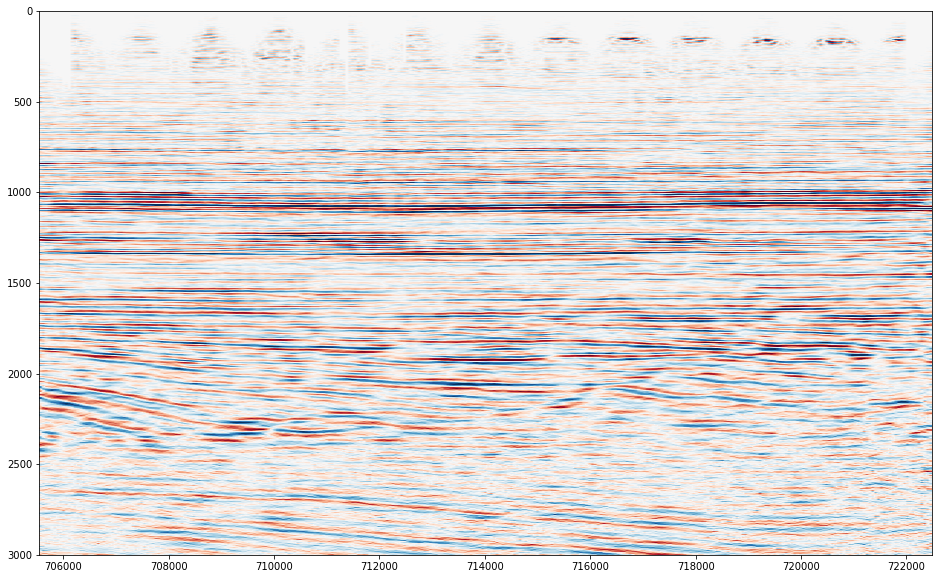

In [8]:
# Obtenção do valor para limite de cores que é maior que 99% dos dados.
valor_clip = np.percentile(np.abs(inline_100), 99.0)

plt.figure(figsize=(16, 10))
plt.imshow(
    # A função imshow é preparada para trabalhar com figuras, em que o dado é
    # organizado linha a linha.
    # Como o dado sísmico é organizado traço a traço, devemos transpor o dado
    # para poder visualizá-lo de forma correta
    inline_100.T,
    # Permite que a figura cresça para se adaptar ao tamanho total disponível
    aspect="auto",
    # Mapa de cores que vai do vermelho ao azul, muito usado para sísmica
    cmap="RdBu",
    # Limites da escala de cor simétricos -> vmax=-vmin
    vmin=-valor_clip,
    vmax=valor_clip,
    # Extensão da visualização em termos de crosslines e tempo
    extent=(crosslines[0], crosslines[-1], tempo[-1], tempo[0])
)

Também podemos visualizar um único traço em forma de onda, como pode ser feito em alguns softwares. Para isso devemos fazer uso da função `fill_betweenx` do matplotlib. Essa função permite preencher com uma cor sólida o espaço entre duas curvas.

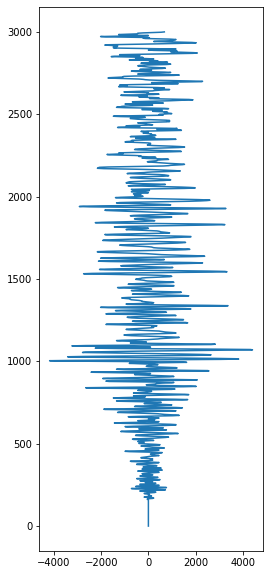

In [ ]:
plt.figure(figsize=(4, 10))
# Plotando o traço 50 da inline 100
plt.plot(inline_100[50], tempo)

(1000.0, 500.0)

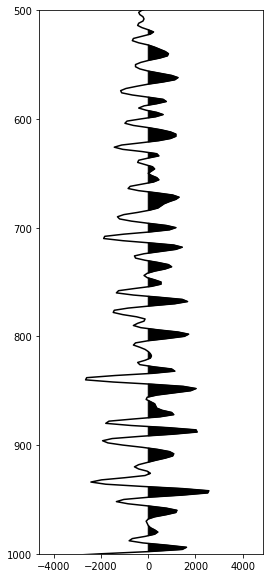

In [ ]:
plt.figure(figsize=(4, 10))
# Plotando o traço 50 da inline 100 com cor preta
plt.plot(inline_100[50], tempo, c="k")
# Preenchendo a curva onde a amplitude for maior que 0
plt.fill_betweenx(tempo, 0.0, inline_100[50], where=inline_100[50] > 0.0, interpolate=True, color="k")
# Zoom entre 500 e 1000 ms
plt.ylim(1000.0, 500.0)

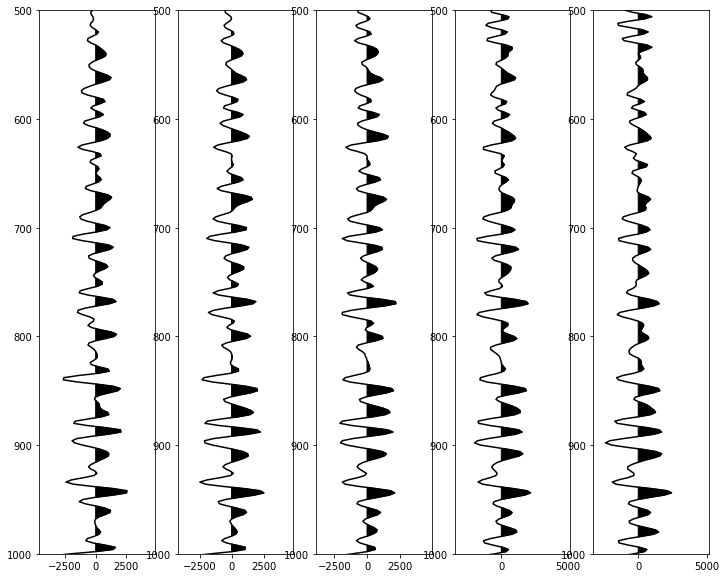

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(12, 10))

# Plotando diversos traços em sequência usando um loop
for i in range(5):
    axes[i].plot(inline_100[50+i], tempo, c="k")
    axes[i].fill_betweenx(tempo, 0.0, inline_100[50+i], where=inline_100[50+i] > 0.0, interpolate=True, color="k")
    axes[i].set_ylim(1000.0, 500.0)

# Atributos sísmicos

Segundo [Chopra e Marfurt (2007)](https://library.seg.org/doi/10.1190/1.9781560801900):

> Um atributo sísmico é qualquer medida no dado sísmico que nos ajuda a melhorar visualmente ou quantificar feições de interesse interpretativo.

Desde sua gênese, na década de 1970, foram criados diversos tipos de atributos utilizados com inúmeras finalidades. Existem diferentes classificações de atributos sísmicos, a depender do autor. Algumas das classificações mais comuns são:

- Atributos instanâneos: baseados no sinal analítico
- Atributos geométricos: baseados na relação espacial entre traços vizinhos
- Atributos janelados: baseados na sumarização dos valores do dado sísmico em uma janela temporal
- Atributos pre-stack: baseados na variação da amplitude do dado com o ângulo de afastamento (AVO)

Aqui veremos somente alguns dos atributos instantâneos e janelados, devido a sua maior simplicidade comparado a outros atributos.


### Atributos janelados

Os atributos sísmicos janelados são calculados com base nos valores da amplitude sísmica presentes em uma janela temporal. Tais atributos podem ser calculados em todas posições de um traço, e por isso tal janela é movida ao longo de todas amostras do traço (janela móvel).

#### Energia média

A energia de um sinal sísmico é definida como o quadrado de sua amplitude. Sendo assim, a energia média de uma janela é dada por:

$$E_i = \frac{1}{2 \cdot l + 1}\sum_{j=i-l}^{i+l} A_j^2$$

Essa fórmula irá calcular a energia para a i-ésima amostra do traço. Observe também que nesse caso a janela contem $2 \cdot l + 1$ amostras. O valor de $l$ pode ser considerado um parâmetro do atributo, pois diferentes tamanhos de janela irão produzir diferentes resultados. Geralmente seu valor é dado em segundos ou milissegundos, porém aqui iremos trabalhar diretamente com o número de amostras.

(1500.0, 500.0)

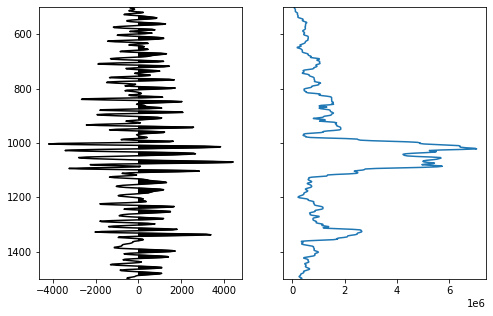

In [ ]:
# Selecionando um traço
traco = inline_100[50]

# Definindo o tamanho da janela
l = 10

# Criando um vetor vazio para calcular a energia
energia = np.empty_like(traco)

# Percorrendo todas amostras do traço e calculando a energia média
for i in range(traco.shape[0]):
    inicio_janela = i - l
    # Cuidado com os índices!!!
    if inicio_janela < 0:
        inicio_janela = 0
    
    fim_janela = i + l
    if fim_janela > traco.shape[0] - 1:
        fim_janela = traco.shape[0] - 1
    
    soma_energia = 0.0
    # Lembrar que o range é um intervalo fechado na esquerda e aberto na direita
    for j in range(inicio_janela, fim_janela+1):
        soma_energia += traco[j]**2.0
    
    energia[i] = soma_energia/(fim_janela - inicio_janela + 1)

# Visualizando o traço e a sua energia entre 500ms e 1500ms
fig, axes = plt.subplots(1, 2, figsize=(8, 5), sharey=True)
axes[0].plot(traco, tempo, "k")
axes[0].fill_betweenx(tempo, 0.0, traco, where=traco > 0.0, interpolate=True, color="k")
axes[1].plot(energia, tempo)

axes[0].set_ylim(1500.0, 500.0)

(1500.0, 500.0)

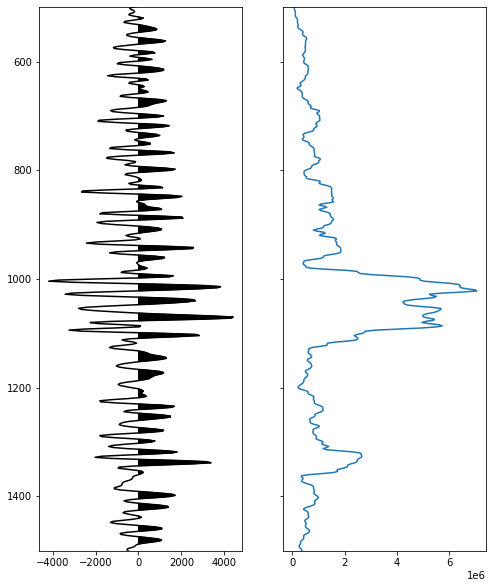

In [ ]:
energia = np.empty_like(traco)

# Percorrendo todas amostras do traço e calculando a energia média
for i in range(traco.shape[0]):
    inicio_janela = i - l
    # Cuidado com os índices!!!
    if inicio_janela < 0:
        inicio_janela = 0
    
    fim_janela = i + l
    if fim_janela > traco.shape[0] - 1:
        fim_janela = traco.shape[0] - 1
    
    # O numpy já possui uma função para cálculo da média!
    energia[i] = np.mean(traco[inicio_janela:fim_janela+1]**2.0)

# Visualizando o traço e a sua energia entre 500ms e 1500ms
fig, axes = plt.subplots(1, 2, figsize=(8, 10), sharey=True)
axes[0].plot(traco, tempo, "k")
axes[0].fill_betweenx(tempo, 0.0, traco, where=traco > 0.0, interpolate=True, color="k")
axes[1].plot(energia, tempo)

axes[0].set_ylim(1500.0, 500.0)

In [ ]:
# Usando o valor de l como um parâmetro com valor default 10
def atributo_energia_media(traco, l=10):
    energia = np.empty_like(traco)
    for i in range(traco.shape[0]):
        inicio_janela = i - l
        if inicio_janela < 0:
            inicio_janela = 0
        
        fim_janela = i + l
        if fim_janela > traco.shape[0] - 1:
            fim_janela = traco.shape[0] - 1
        
        energia[i] = np.mean(traco[inicio_janela:fim_janela+1]**2.0)

    return energia

(1500.0, 500.0)

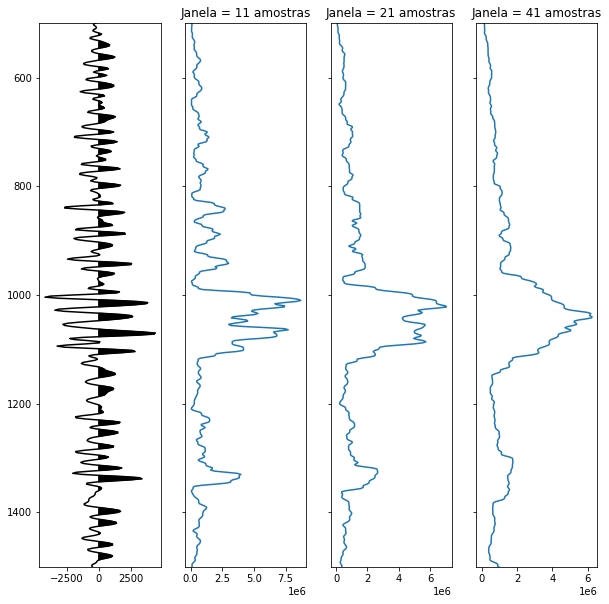

In [ ]:
# Agora podemos calcular a energia com diferentes tamanhos de janela de forma mais fácil
janelas = [5, 10, 20]

fig, axes = plt.subplots(1, len(janelas) + 1, figsize=(10, 10), sharey=True)
axes[0].plot(traco, tempo, "k")
axes[0].fill_betweenx(tempo, 0.0, traco, where=traco > 0.0, interpolate=True, color="k")
for ax, l in zip(axes[1:], janelas):
    ax.plot(atributo_energia_media(traco, l), tempo)
    ax.set_title(f"Janela = {2*l+1} amostras")

axes[0].set_ylim(1500.0, 500.0)

#### Exercícios

1. Calcule a energia para a seção inteira e visualize do lado da amplitude

2. Calcule o atributo de amplitude RMS
> $$A_{RMS,i} = \sqrt{\frac{1}{2 \cdot l + 1}\sum_{j=i-l}^{i+l} A_j^2}$$

Text(0.5, 1.0, 'Energia Média - Janela 21 amostras')

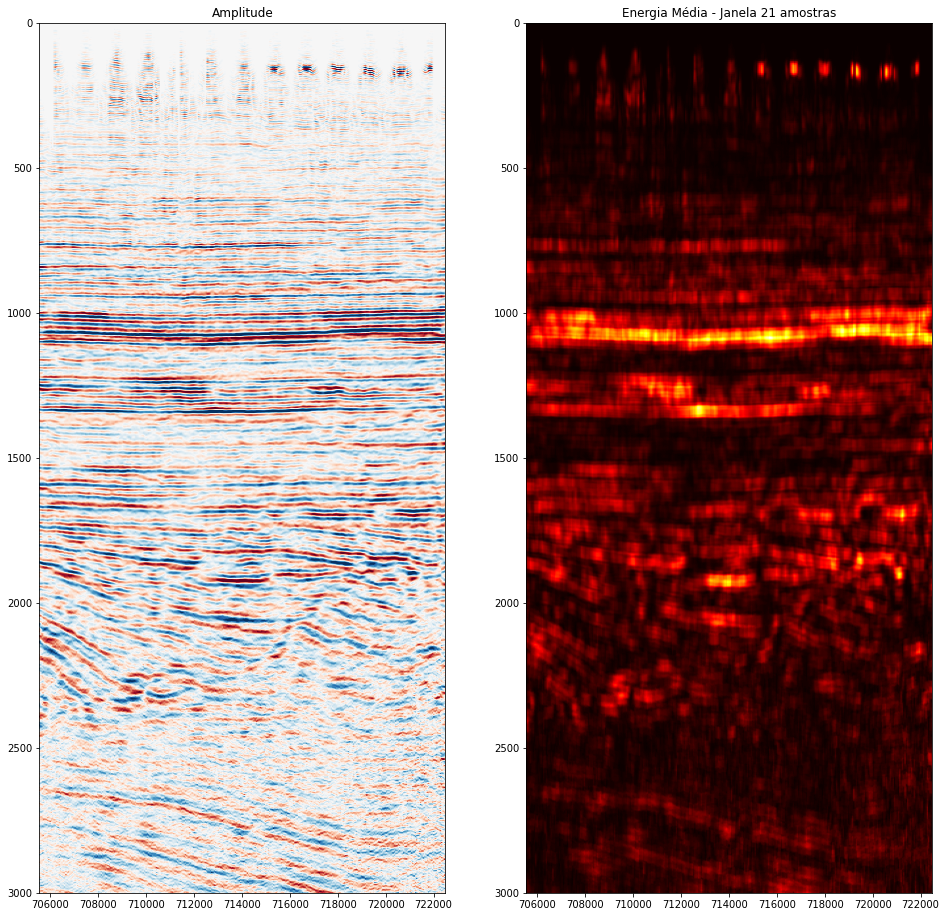

In [ ]:
# Criando o array vazio
energia = np.empty_like(inline_100)

l = 10
# Percorrendo todos os traços
for i in range(inline_100.shape[0]):
    energia[i] = atributo_energia_media(inline_100[i], l)

fig, axes = plt.subplots(1, 2, figsize=(16, 16))
axes[0].imshow(
    inline_100.T,
    aspect="auto",
    cmap="RdBu",
    vmin=-valor_clip,
    vmax=valor_clip,
    extent=(crosslines[0], crosslines[-1], tempo[-1], tempo[0])
)
axes[0].set_title("Amplitude")
axes[1].imshow(
    energia.T,
    aspect="auto",
    cmap="hot",
    vmin=0.0,
    extent=(crosslines[0], crosslines[-1], tempo[-1], tempo[0])
)
axes[1].set_title(f"Energia Média - Janela {2*l+1} amostras")

In [ ]:
def atributo_amplitude_rms(traco, l=10):
    amplitude_rms = np.empty_like(traco)
    for i in range(traco.shape[0]):
        inicio_janela = i - l
        if inicio_janela < 0:
            inicio_janela = 0
        
        fim_janela = i + l
        if fim_janela > traco.shape[0] - 1:
            fim_janela = traco.shape[0] - 1
        
        amplitude_rms[i] = np.sqrt(np.mean(traco[inicio_janela:fim_janela+1]**2.0))

    return amplitude_rms

Text(0.5, 1.0, 'Amplitude RMS - Janela 21 amostras')

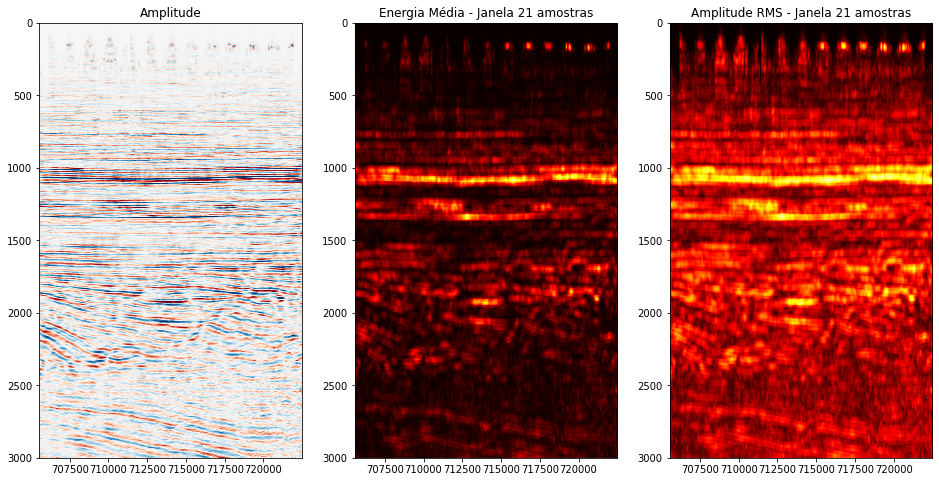

In [ ]:
amplitude_rms = np.empty_like(inline_100)

l = 10
for i in range(inline_100.shape[0]):
    amplitude_rms[i] = atributo_amplitude_rms(inline_100[i], l)

fig, axes = plt.subplots(1, 3, figsize=(16, 8))
axes[0].imshow(
    inline_100.T,
    aspect="auto",
    cmap="RdBu",
    vmin=-valor_clip,
    vmax=valor_clip,
    extent=(crosslines[0], crosslines[-1], tempo[-1], tempo[0])
)
axes[0].set_title("Amplitude")
axes[1].imshow(
    energia.T,
    aspect="auto",
    cmap="hot",
    vmin=0.0,
    extent=(crosslines[0], crosslines[-1], tempo[-1], tempo[0])
)
axes[1].set_title(f"Energia Média - Janela {2*l+1} amostras")
axes[2].imshow(
    amplitude_rms.T,
    aspect="auto",
    cmap="hot",
    vmin=0.0,
    extent=(crosslines[0], crosslines[-1], tempo[-1], tempo[0])
)
axes[2].set_title(f"Amplitude RMS - Janela {2*l+1} amostras")

### Atributos instanâneos

Os atributos instantâneos são um conjunto de atributos calculados com base no sinal analítico. O sinal analítico é uma extensão matemática do sinal sísmico considerando que o mesmo não possui frequências negativas. Sendo assim o sinal analítico possui componente real igual ao sinal sísmico e componente complexa igual a transformada de Hilbert do sinal sísmico. O mesmo pode ser descrito através da seguinte equação:

$$s_a = s + i \cdot H[s]$$

Onde $s_a$ é o sinal analítico, $s$ é o sinal sísmico, $i^2 = -1$ e $H[x]$ é a transformada de Hilbert de $x$.

Dentre os atributos instantâneos veremos os seguintes ([Chopra e Marfurt, 2005](https://library.seg.org/doi/abs/10.1190/1.2098670)):
- Envelope: sensível a mudanças de impedância acústica e, consequentemente, de litologia, porosidade, hidrocarbonetos, etc
- Fase instantânea: útil para acompanhar refletores devido a sua maior continuidade, e consequentemente detectar mudanças laterais causadas por falhas e inconformidades
- Frequência instantânea: útil para identificar atenuação anormais e camadas delgadas

#### Envelope

O envelope nada mais é que a amplitude do sinal analítico, isto é:

$$e = |s_a|$$

In [ ]:
# Importando a função para cálculo do sinal analítico, presente no módulo `signal` do `scipy`
# Apesar do nome, essa função computa o sinal analítico e não a transformada de Hilbert
from scipy.signal import hilbert

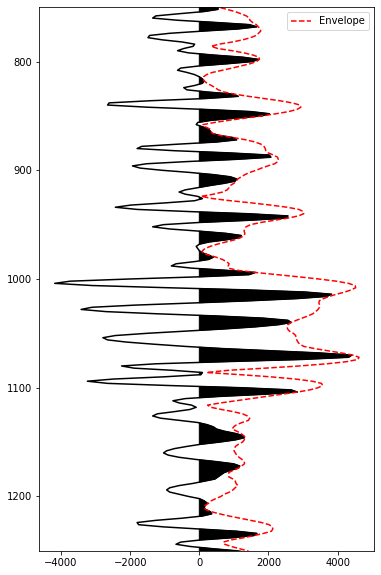

In [ ]:
# Selecionando um traço qualquer
traco = inline_100[50]

# Cálculo do chamado sinal analítico com a transformada de Hilbert
sinal_analitico = hilbert(traco)

# Cálculo do envelope, que nada mais é que a magnitude do sinal analítico
envelope = np.abs(sinal_analitico)

# Visualizando junto com o traço
fig, ax = plt.subplots(figsize=(6, 10))

ax.plot(traco, tempo, "k")
ax.fill_betweenx(tempo, 0.0, traco, where=traco > 0.0, interpolate=True, color="k")
ax.plot(envelope, tempo, "r--", label="Envelope")
ax.set_ylim(1250.0, 750.0)
ax.legend()

Text(0.5, 1.0, 'Envelope')

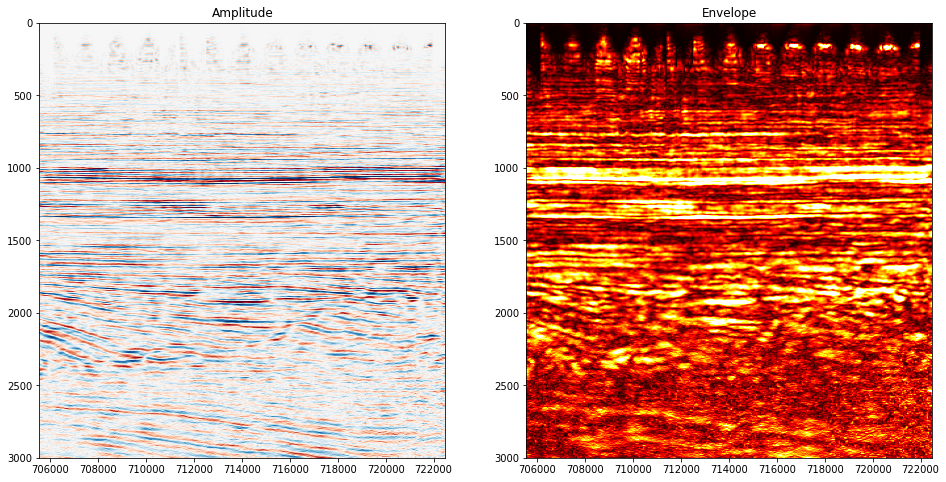

In [ ]:
# O numpy permite calcular o sinal analítico para todos os traços de uma vez só!
# axis=1 é a direção do traço
sinal_analitico = hilbert(inline_100, axis=1)

envelope = np.abs(sinal_analitico)

# Visualizando o envelope ao lado da amplitude
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
axes[0].imshow(
    inline_100.T,
    aspect="auto",
    cmap="RdBu",
    vmin=-valor_clip,
    vmax=valor_clip,
    extent=(crosslines[0], crosslines[-1], tempo[-1], tempo[0])
)
axes[0].set_title("Amplitude")
axes[1].imshow(
    envelope.T,
    aspect="auto",
    cmap="hot",
    vmin=0.0,
    vmax=valor_clip,
    extent=(crosslines[0], crosslines[-1], tempo[-1], tempo[0])
)
axes[1].set_title("Envelope")

#### Fase instantânea

De maneira muito similar ao envelope, a fase instantânea nada mais é que a fase do sinal analítico, isto é:

$$\theta = \tan^{-1}\left(\frac{Im(s_a)}{Re(s_a)}\right)$$

A função `angle` do `numpy` faz exatamente esse cálculo para um número complexo.

In [ ]:
# Cálculo do fase instantânea, que nada mais é que a fase do sinal analítico
fase_instantanea = np.angle(sinal_analitico)

Text(0.5, 1.0, 'Fase Instantânea')

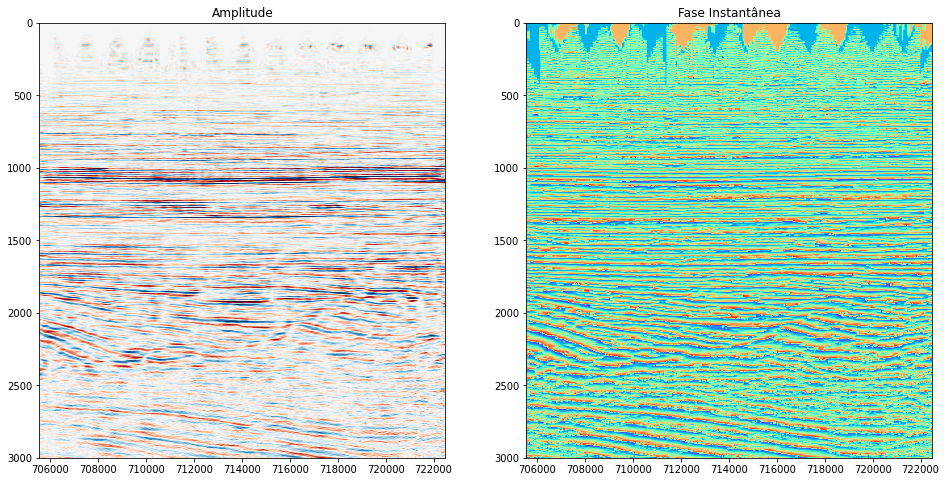

In [ ]:
# Visualizando a fase instantânea ao lado da amplitude
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
axes[0].imshow(
    inline_100.T,
    aspect="auto",
    cmap="RdBu",
    vmin=-valor_clip,
    vmax=valor_clip,
    extent=(crosslines[0], crosslines[-1], tempo[-1], tempo[0])
)
axes[0].set_title("Amplitude")
axes[1].imshow(
    fase_instantanea.T,
    aspect="auto",
    cmap="rainbow",
    vmin=-np.pi,
    vmax=np.pi,
    extent=(crosslines[0], crosslines[-1], tempo[-1], tempo[0])
)
axes[1].set_title("Fase Instantânea")

#### Exercício

Calcule o atributo de frequência instantânea.

A frequência instantânea é a derivada temporal da fase instantânea.

**Observações:**
> A fase obtida anteriormente é definida em $-\pi \le \theta \lt \pi$, se repetindo de forma cíclica. Para o cálculo da frequência instantânea a mesma deve estar disposta de forma contínua. Isso pode ser feito com a função `unwrap` do `numpy`.

> A derivada numérica de um vetor pode ser calculada com a função `gradient` do `numpy`.

In [ ]:
# Para o cálculo da derivada temporal podemos usar a função gradient do numpy
# O intervalo de amostragem é de 4ms (0.004s)
freq_instantanea = np.gradient(np.unwrap(fase_instantanea, axis=1), 0.002, axis=1)/(2.0 * np.pi)

# Definindo bons valores para os limites de cor
freq_inst_min = np.percentile(freq_instantanea, 0.5)
freq_inst_max = np.percentile(freq_instantanea, 99.5)

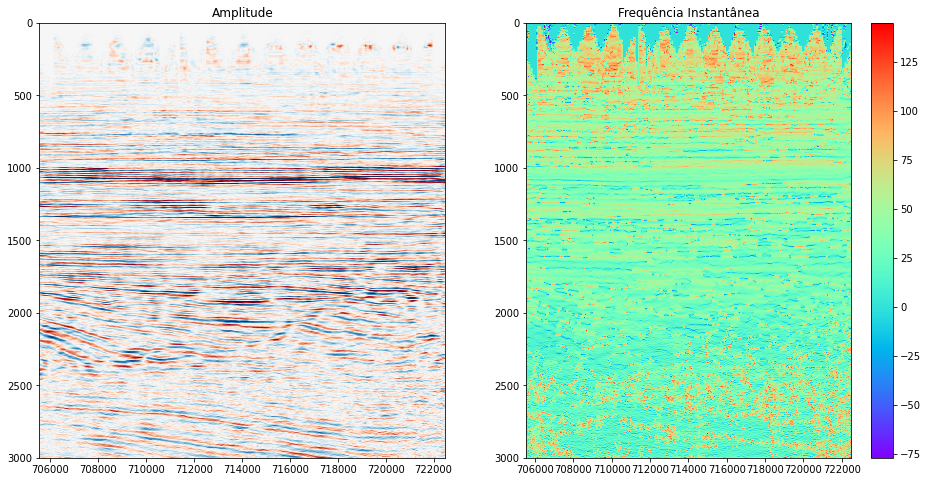

In [ ]:
# Visualizando a fase instantânea ao lado da amplitude
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
axes[0].imshow(
    inline_100.T,
    aspect="auto",
    cmap="RdBu",
    vmin=-valor_clip,
    vmax=valor_clip,
    extent=(crosslines[0], crosslines[-1], tempo[-1], tempo[0])
)
axes[0].set_title("Amplitude")
im = axes[1].imshow(
    freq_instantanea.T,
    aspect="auto",
    cmap="rainbow",
    vmin=freq_inst_min,
    vmax=freq_inst_max,
    extent=(crosslines[0], crosslines[-1], tempo[-1], tempo[0])
)
axes[1].set_title("Frequência Instantânea")
fig.colorbar(im, ax=axes[1])

## Sumarizando

Agora vamos ver todos atributos que calculamos lado a lado e tentar entender o que cada um deles pode contribuir na interpretação sísmica.

(2250.0, 750.0)

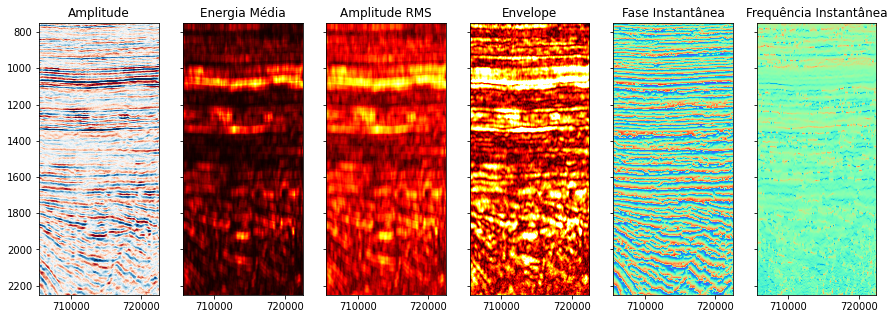

In [ ]:
fig, axes = plt.subplots(1, 6, figsize=(15, 5), sharex=True, sharey=True)
axes[0].imshow(
    inline_100.T,
    aspect="auto",
    cmap="RdBu",
    vmin=-valor_clip,
    vmax=valor_clip,
    extent=(crosslines[0], crosslines[-1], tempo[-1], tempo[0])
)
axes[0].set_title("Amplitude")
axes[1].imshow(
    energia.T,
    aspect="auto",
    cmap="hot",
    vmin=0.0,
    extent=(crosslines[0], crosslines[-1], tempo[-1], tempo[0])
)
axes[1].set_title(f"Energia Média")
axes[2].imshow(
    amplitude_rms.T,
    aspect="auto",
    cmap="hot",
    vmin=0.0,
    extent=(crosslines[0], crosslines[-1], tempo[-1], tempo[0])
)
axes[2].set_title(f"Amplitude RMS")
axes[3].imshow(
    envelope.T,
    aspect="auto",
    cmap="hot",
    vmin=0.0,
    vmax=valor_clip,
    extent=(crosslines[0], crosslines[-1], tempo[-1], tempo[0])
)
axes[3].set_title("Envelope")
axes[4].imshow(
    fase_instantanea.T,
    aspect="auto",
    cmap="rainbow",
    vmin=-np.pi,
    vmax=np.pi,
    extent=(crosslines[0], crosslines[-1], tempo[-1], tempo[0])
)
axes[4].set_title("Fase Instantânea")
axes[5].imshow(
    freq_instantanea.T,
    aspect="auto",
    cmap="rainbow",
    vmin=freq_inst_min,
    vmax=freq_inst_max,
    extent=(crosslines[0], crosslines[-1], tempo[-1], tempo[0])
)
axes[5].set_title("Frequência Instantânea")

axes[0].set_ylim(2250.0, 750.0)

-249.99999220494746 249.99999987322917


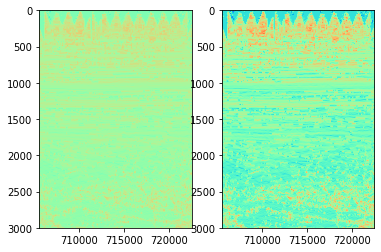

In [ ]:
fig, axes = plt.subplots(1, 2)
axes[0].imshow(
    freq_instantanea.T,
    aspect="auto",
    cmap="rainbow",
    vmin=np.min(freq_instantanea),
    vmax=np.max(freq_instantanea),
    extent=(crosslines[0], crosslines[-1], tempo[-1], tempo[0])
)
axes[1].imshow(
    freq_instantanea.T,
    aspect="auto",
    cmap="rainbow",
    vmin=freq_inst_min,
    vmax=freq_inst_max,
    extent=(crosslines[0], crosslines[-1], tempo[-1], tempo[0])
)


(array([2.1600e+02, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 2.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        2.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00, 6.1000e+01,
        2.1200e+02, 6.0000e+00, 1.6000e+01, 3.8000e+01, 7.7000e+01,
        1.7500e+02, 2.7900e+02, 3.6900e+02, 5.0700e+02, 5.7000e+02,
        6.6000e+02, 7.3900e+02, 7.7700e+02, 7.9000e+02, 8.6700e+02,
        9.4300e+02, 1.0280e+03, 1.1800e+03, 1.3050e+03, 1.5640e+03,
        1.9210e+03, 2.3540e+03, 2.8210e+03, 3.6140e+03, 1.4073e+04,
        1.5369e+04, 9.1790e+03, 1.3330e+04, 1.9609e+04, 2.8715e+04,
        3.9474e+04, 4.7042e+04, 4.6610e+04, 3.9733e+04, 3.2156e+04,
        2.5991e+04, 2.2106e+04, 1.8353e+04, 1.5167e+04, 1.2146e+04,
        9.4850e+03, 6.9560e+03, 5.2510e+03, 3.8350e+03, 2.9320e+03,
        2.1040e+03, 1.6400e+03, 1.3860e+03, 1.16

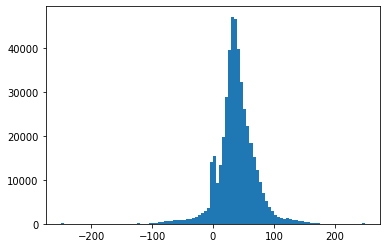

In [ ]:
plt.hist(freq_instantanea.flatten(), bins=100)

In [ ]:
freq_inst_min = np.percentile(freq_instantanea, 0.5)
freq_inst_max = np.percentile(freq_instantanea, 99.5)
print(freq_inst_min, freq_inst_max)

-76.85758224294923 144.74303305649923
